This is a personal project on Machine Learning Classifications Algorithms

Attempt to apply all theoritical ML knowledge to a real world data
And have a feel of modeling ML algorithms
by Blibo Albert @bliboalbert

In [1]:
# Import libraries for ml 

In [3]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
# import libraries for data analysis and preparation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Steps:
    get data
    prepare data
    train model
    test model
    evaluate model
    conclude on model performance and accuracy

In [7]:
# First model - Naive Baye's Classification algorithm
# The intuition of this model is the conditional probability of dependent events
# The algorithm outputs result as a probability of an event occuring given one event has occured

In [ ]:
# preparing data for training

In [8]:
iris_data = load_iris()

In [16]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
iris_data.data[5], iris_data.target[:5]

(array([5.4, 3.9, 1.7, 0.4]), array([0, 0, 0, 0, 0]))

In [ ]:
# create a dataframe for data - not necessary but ok

In [17]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# add target to data frame

In [20]:
iris_df['target'] = iris_data.target

In [21]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris_df.shape

(150, 5)

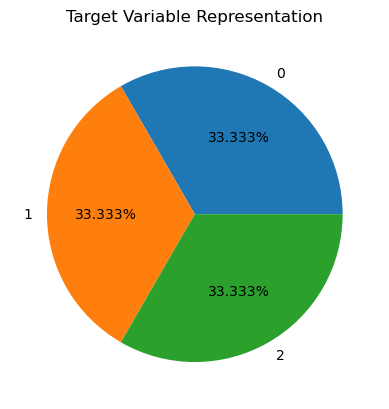

In [119]:
# Data Analysis
# each target class is unique
target = iris_df.target.unique()
target_size = iris_df.target.value_counts().values

# make pie chart visuals of the target data
fig, ax = plt.subplots()
ax.pie(target_size, labels=target, autopct='%1.3f%%')
ax.set_title('Target Variable Representation')
plt.show()

In [120]:
# seeing the visual above, it is confirmed the iris data is balanced on each class.

In [154]:
# preparing feature matrix and target/response vector for training/testing
# these will be used as the same in all the models trained in this project

In [155]:
X = iris_df.iloc[:, :-1] #ignore last item in the features

In [171]:
# iris dataset in sklearn is already normally distributed, hence no need for preprocessing
# standardScaler and Normalization
# guassian distribution on sepal width (cm)

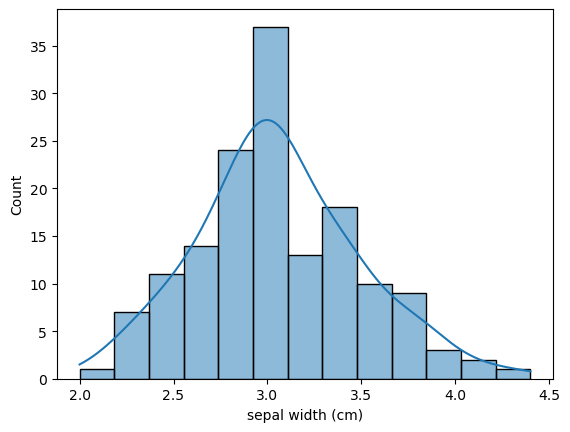

In [170]:
import seaborn as sns
sepal_width = iris_df.iloc[:, 1]
sns.histplot(sepal_width, kde=True)
plt.show()

In [156]:
y = iris_df.iloc[:,-1] #select last item

In [121]:
# employing the holdout evaluation approach technique to get train and test datasets
# train/test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=44)

In [35]:
# checking for biases in datasets - train and test datasets should be balanced
print('Train and Test datasets are balanced: Train size is {} and Test size is {}'.format(X_train.shape, X_test.shape))

Train and Test datasets are balanced: Train size is (97, 4) and Test size is (53, 4)


Naive Baye's Classifier Algorithm

In [36]:
# Naive Baye's classification
# model instance or object - nb_model = GaussianNB()

In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model

GaussianNB()

In [38]:
# make inference with test and train datasets

In [39]:
yhat_nb = nb_model.predict(X_train)

In [41]:
yhat_nb[:5]

array([0, 2, 2, 2, 1])

In [42]:
y_train[:5]

30     0
127    2
132    2
138    2
78     1
Name: target, dtype: int32

In [172]:
# from the inference, nb_model has predicted the exact values as the train dataset 
# thus almost 100% matching
nb_df = pd.DataFrame(y_train)
nb_df['yhat_nb'] = yhat_nb

In [44]:
nb_df

,target,yhat_nb
30,0,0
127,2,2
132,2,2
138,2,2
78,1,1
...,...,...
84,1,1
96,1,1
131,2,2
59,1,1


In [47]:
# making inference with test dataset
yhat_test_nb = nb_model.predict(X_test)

In [48]:
yhat_test_nb[:5]

array([2, 0, 1, 1, 2])

In [49]:
y_test[:5]

144    2
9      0
79     1
95     1
104    2
Name: target, dtype: int32

In [55]:
# from the inference, nb_model has predicted the exact values as the train dataset 
# thus almost 100% matching
nb_test_df = pd.DataFrame(y_test)
nb_test_df['yhat_test_nb'] = yhat_test_nb
nb_test_df[:10]

,target,yhat_test_nb
144,2,2
9,0,0
79,1,1
95,1,1
104,2,2
47,0,0
118,2,2
107,2,2
102,2,2
90,1,1


In [57]:
# let's look at the performance score and report from stats
train_report = classification_report(y_train, yhat_nb)
test_report = classification_report(y_test, yhat_test_nb)
print("Classification Report for Naive Baye's Model for Train and Test datasets:
      \nTrain dataset \n{} \n Test dataset\n{}".format(train_report, test_report))

Classification Report for Naive Baye's Model for Train and Test datasets: 
Train dataset 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      0.94      0.94        35
           2       0.94      0.94      0.94        32

    accuracy                           0.96        97
   macro avg       0.96      0.96      0.96        97
weighted avg       0.96      0.96      0.96        97
 
 Test dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      0.93      0.90        15
           2       0.94      0.89      0.91        18

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



In [101]:
# Accuracy score for model - test dataset
print("Accuracy Score: Naive Baye's {0:.2f}".format(accuracy_score(y_test, yhat_test_nb)))

Accuracy Score: Naive Baye's 0.94


In [174]:
# In other to prove the accuracy of this model, external dataset on iris flower can be used.
# Here we'll just predict from the model using the data at hand as ground truth - program the model to
# use the name of the flower ( satosa, versicolor or virginica) 
# together with the class (0, 1 or 2)
# example -:
# for id in yhat_test_nb:  if id == 0: print('class_name') et al.
# The End :- Naive Baye's Classifier

Logistic Regression Classifier Algorithm

In [175]:
# Logistic Regression Classifier
# This ml algorith's output is a probability that an event has occur - or a class is selected
# for example yhat = p(y=1|x:w) :- meaning the probability that a class is 1, 
# giving feature x parameterized by weight w
# to limit the errors in prediction, the weight, w is updated after every iteration 
# to minimize the loss or cost:- j(w) = -ylog2(yhat)-(1-y)log2(1-yhat)
# note:- cost function j(w) = 1/2m(sum(yhat-y)^2) for Logistic Regression because it's non-convex
 

In [176]:
# initialize model
# for a multiclass classification, as dataset indicates, one-vs-rest approach will be applied 
# behind the scene
lr_model = LogisticRegression(max_iter=300) # all default parameters except 
# max_iter are accepted as our hyperparameters
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(max_iter=300)

In [64]:
# make inferences with train and test datasets

In [68]:
# train dataset
y_train_pred = lr_model.predict(X_train)
y_train_pred[:5]

array([0, 2, 2, 1, 1])

In [67]:
# we can also see the probability score as well
y_train_prob = lr_model.predict_proba(X_train)
y_train_prob[:5]

array([[9.52017337e-01, 4.79823538e-02, 3.08758519e-07],
       [2.28145086e-03, 4.63848162e-01, 5.33870388e-01],
       [3.55383204e-05, 5.12912884e-02, 9.48673173e-01],
       [3.41112749e-03, 5.26117185e-01, 4.70471687e-01],
       [9.69615235e-03, 8.16052226e-01, 1.74251622e-01]])

In [177]:
# to interpret the probability score above - remember we have 3 classes [0,1,3] as this is a 
# multiclass classification
# each columns in the outcome array above is the classes 0, 1 and 2 respectively.
# total probability is 1 (probability has values between 0-1)
# the column with the highest score is the most and obvious predicted class.
# y_train_pred[0] == y_train_prob[0], thus we have 0 as predicted in first postion in y_train_pred
# and its probability is the highest in y_train_prob first position (0.95)
# thus first column is p(y=0|x:w), 2nd column is p(y=1|x:w), 3rd column is p(y=2|x:w)

In [70]:
# inference on test dataset
y_test_pred = lr_model.predict(X_test)
y_test_prob = lr_model.predict_proba(X_test)
y_train_prob[:5]

array([[9.52017337e-01, 4.79823538e-02, 3.08758519e-07],
       [2.28145086e-03, 4.63848162e-01, 5.33870388e-01],
       [3.55383204e-05, 5.12912884e-02, 9.48673173e-01],
       [3.41112749e-03, 5.26117185e-01, 4.70471687e-01],
       [9.69615235e-03, 8.16052226e-01, 1.74251622e-01]])

In [90]:
# prediction table for train and test dataset evaluation
lr_df = pd.DataFrame(y_train)
lr_test = pd.DataFrame(y_test)

In [91]:
lr_df['y_train_pred'] = y_train_pred
lr_test['y_test_pred'] = y_test_pred

In [93]:
lr_df.dropna(axis=1).head()

,target,y_train_pred
30,0,0
127,2,2
132,2,2
138,2,1
78,1,1


In [92]:
lr_test.head()

,target,y_test_pred
144,2,2
9,0,0
79,1,1
95,1,1
104,2,2


In [94]:
# classification report and accuracy score on test dataset

In [100]:
print(classification_report(y_test, y_test_pred))
print('Accuracy Score: Logistic Regression {0:.2f}'.format(accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

Accuracy Score: Logistic Regression 0.98


Confusion Matrix visual for LogisticRegression Evaluation

In [124]:
cf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1,2])
print(cf_matrix)

[[20  0  0]
 [ 0 15  0]
 [ 0  1 17]]


In [142]:
# confusion matrix in 2D
import itertools

def plot_conf_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without Normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Confusion Matrix without Normalization


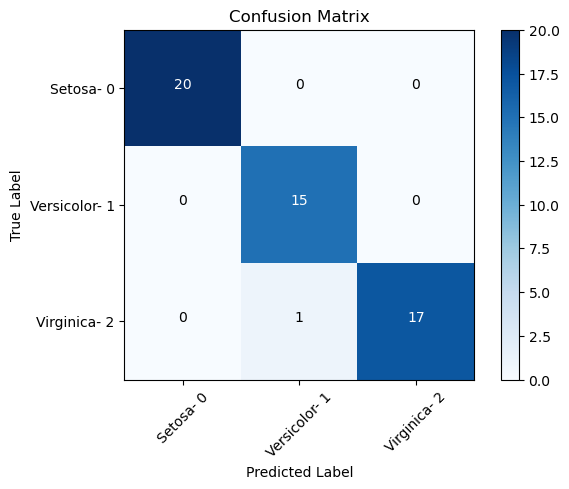

In [178]:
plot_conf_matrix(cf_matrix, classes=['Setosa- 0','Versicolor- 1','Virginica- 2'])

In [144]:
# to interpret the confusion matrix above, one must use the one-vs-rest technique 
# for multiclass classification

In [145]:
# comparing the two trained classification models, Logistic Regression model {0.98}
# performed better than Naive Baye's model {0.94} on the same datasets - iris dataset

Decision Tree Classifier Algorithm

In [146]:
# Decision Tree Classifier
# This algorithm employs recursive partitioning on selected features to make decision
# The feature selected is the one with the highest information gain - thus the feature has
# the quality to make unbias decision
# the tree stops growing when there is a pure split or entropy score is almost 0
# and when max_depth is reached
# decision tree model is prone to overfitting hence pre-prunning (by hyperparameter tuning) 
# or post-prunning can be employed to prevent overfitting
# other techniques such such as ensemble techniques can be used to prevent overfitting of the model

In [151]:
# initiate decision tree object
dt_model = DecisionTreeClassifier(criterion='entropy') # keep all default parameters 
# except criterion changed to entropy because training example is small (150 datasets)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(criterion='entropy')

In [152]:
# make inference and evaluations on test dataset
dt_pred = dt_model.predict(X_test)

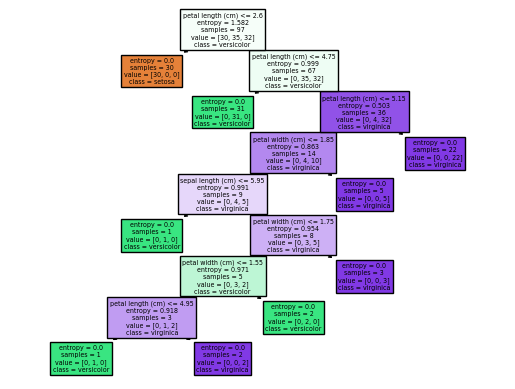

In [153]:
# plot decision tree for visuals
tree.plot_tree(dt_model, feature_names=iris_data.feature_names, 
               class_names=iris_data.target_names, filled=True)
plt.show()

In [110]:
# accuracy score
acc_score = accuracy_score(y_test, y_test_pred)
print('Accuracy Score: Decision Tree {0:.2f}'.format(acc_score))

Accuracy Score: Decision Tree 0.98


In [115]:
# comparing all the classifier models trained in this project, Naive Baye's performance
# is low relatively
# Logistic Regression and Decision Tree performance is high and acceptable 

End of Personal Project of training 3 popular ML Classification
algorithms on the iris dataset in the sklearn library
by Blibo Albert @bliboalbert <- github and LinkedIn
